## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [4]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,Prediction
1985-03,-1.232322,-1.079314,-0.669004,13.035309
1985-06,-1.232322,-1.084088,-0.669004,13.160484
1985-09,-1.232322,-1.081432,-0.669004,16.657703
1985-12,-1.232322,-1.007231,-0.669004,16.345213
1986-03,-1.232322,-1.013861,-0.669004,15.921562
1986-06,-1.232322,-1.022850,-0.669004,14.741072
1986-09,-1.232322,-1.047896,-0.669004,13.267827
1986-12,-1.232322,-1.079154,-0.669004,16.734827
1987-03,-1.232322,-1.005595,-0.669004,18.234604
1987-06,-1.232322,-0.973774,-0.669004,17.033018


## 2.1 No scaled y dataset evaluation

In [3]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
from time import time
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
svr = GridSearchCV(SVR(), n_jobs=-1, error_score=1, cv=cv,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
start_time = time()
print(param_tuner(data,svr,scaling=False))
print(time()-start_time)

{'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
9.790911674499512


In [5]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
#Params={'C': 7, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, svr, cv=cv, scaling=False)

NSC
neg_mean_absolute_percentage_error
	mean: 0.0957927266508625	 std:0.018563516717085143


NSC
neg_root_mean_squared_error
	mean: 9.823946641759665	 std:3.0791228322395208


GL
neg_mean_absolute_percentage_error
	mean: 0.11315062261112155	 std:0.023583095220287304


GL
neg_root_mean_squared_error
	mean: 5.21992178825508	 std:2.087690869028805


PEP
neg_mean_absolute_percentage_error
	mean: 0.08926496566625533	 std:0.015515930264600306


PEP
neg_root_mean_squared_error
	mean: 3.4747041728314265	 std:0.7872046061915012


BDX
neg_mean_absolute_percentage_error
	mean: 0.08625236463829292	 std:0.013117978308182595


BDX
neg_root_mean_squared_error
	mean: 7.43784718301842	 std:2.2976682914910542


IBM
neg_mean_absolute_percentage_error
	mean: 0.13413631854030703	 std:0.03131168408117415


IBM
neg_root_mean_squared_error
	mean: 8.717629446962102	 std:1.5522311409358467


MEAN MAPE: 0.10371939962136786
	 STD: 0.0204184409182659
MEAN RMSE: 6.934809846565338
	 STD: 1.9607835479773459


## 2.2 Scaled y dataset evaluation

In [4]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
svr = GridSearchCV(SVR(), n_jobs=-1, error_score=1, cv=cv,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,svr,scaling=True))

{'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'}


In [6]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, svr, cv=cv, scaling=True)

NSC
neg_mean_absolute_percentage_error
	mean: 0.18455639153255485	 std:0.06187128920724348


NSC
neg_root_mean_squared_error
	mean: 0.19230988421859727	 std:0.04130855041493435


GL
neg_mean_absolute_percentage_error
	mean: 0.39335954170491505	 std:0.17291759059979478


GL
neg_root_mean_squared_error
	mean: 0.13530271909430305	 std:0.055255698274888375


PEP
neg_mean_absolute_percentage_error
	mean: 0.2615245331424467	 std:0.11062785216680289


PEP
neg_root_mean_squared_error
	mean: 0.10813968572600226	 std:0.022167485926811267


BDX
neg_mean_absolute_percentage_error
	mean: 0.45404172051103975	 std:0.1584177706216218


BDX
neg_root_mean_squared_error
	mean: 0.10543587585151618	 std:0.04183343992150766


IBM
neg_mean_absolute_percentage_error
	mean: 0.582048441733868	 std:0.34603976355453664


IBM
neg_root_mean_squared_error
	mean: 0.1791845893503378	 std:0.03633702560427252


MEAN MAPE: 0.37510612572496493
	 STD: 0.16997485322999992
MEAN RMSE: 0.1440745508481513
	 STD: 0.0393804400284

## 3.0 Model testing settings

In [6]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_Manual_dataset.csv', PATH)

## 3.1 Random split - No scaled prediction variable

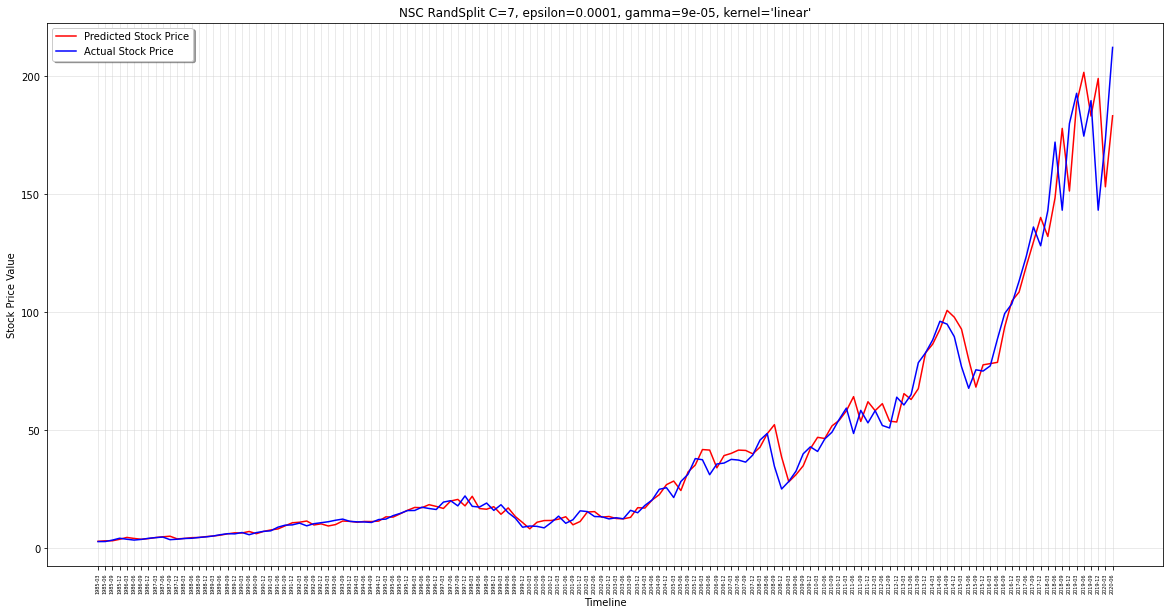

NSC MODEL RESULTS
 RMSE
 	Test: 4.521164821914579
 MAPE
 	Test: 0.08641862937246705
 MAE
 	Test: 2.782362491012798
 R2 Score Adj
 	Test: 0.9886613639109199



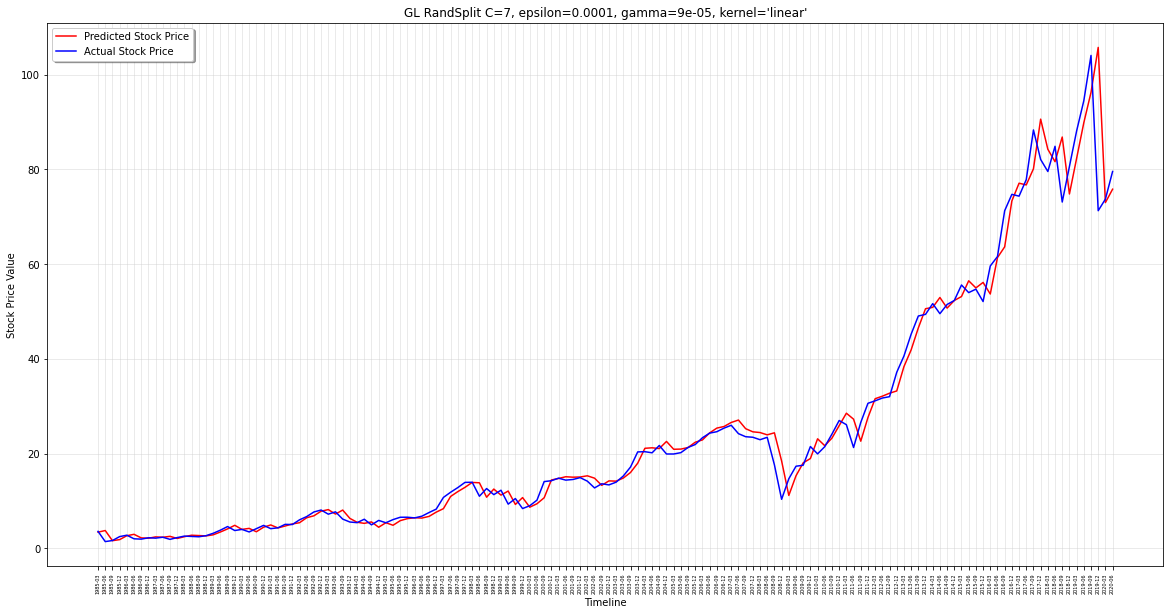

GL MODEL RESULTS
 RMSE
 	Test: 2.1759961725913515
 MAPE
 	Test: 0.09461366554305826
 MAE
 	Test: 1.5347711281774261
 R2 Score Adj
 	Test: 0.9910878628374727



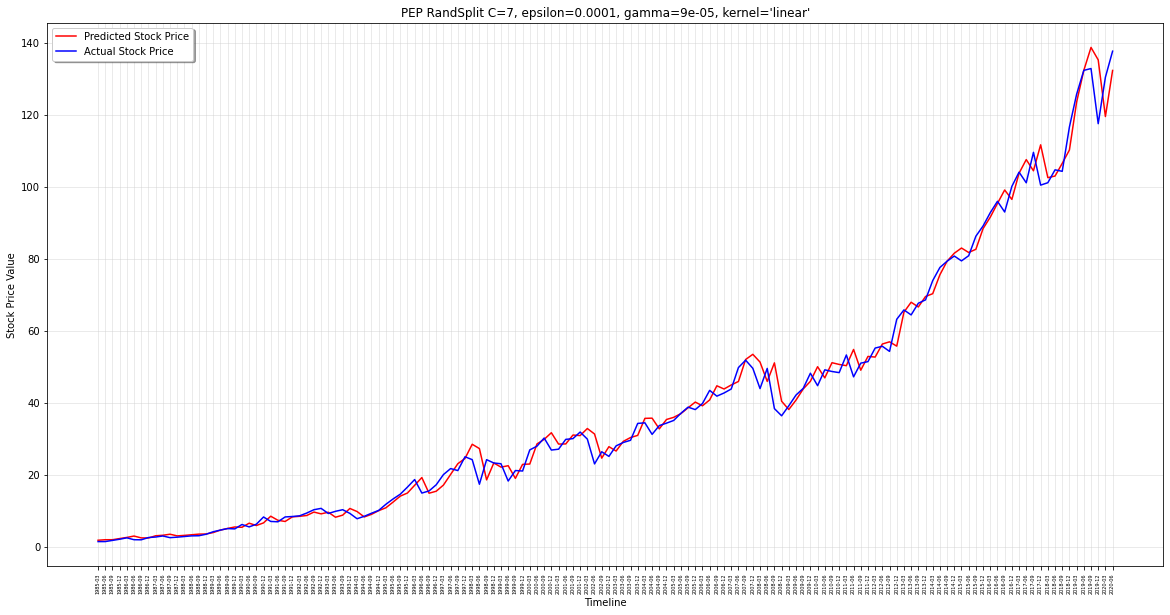

PEP MODEL RESULTS
 RMSE
 	Test: 2.30754938492603
 MAPE
 	Test: 0.08684300849586325
 MAE
 	Test: 1.57912309531909
 R2 Score Adj
 	Test: 0.9947586255317692



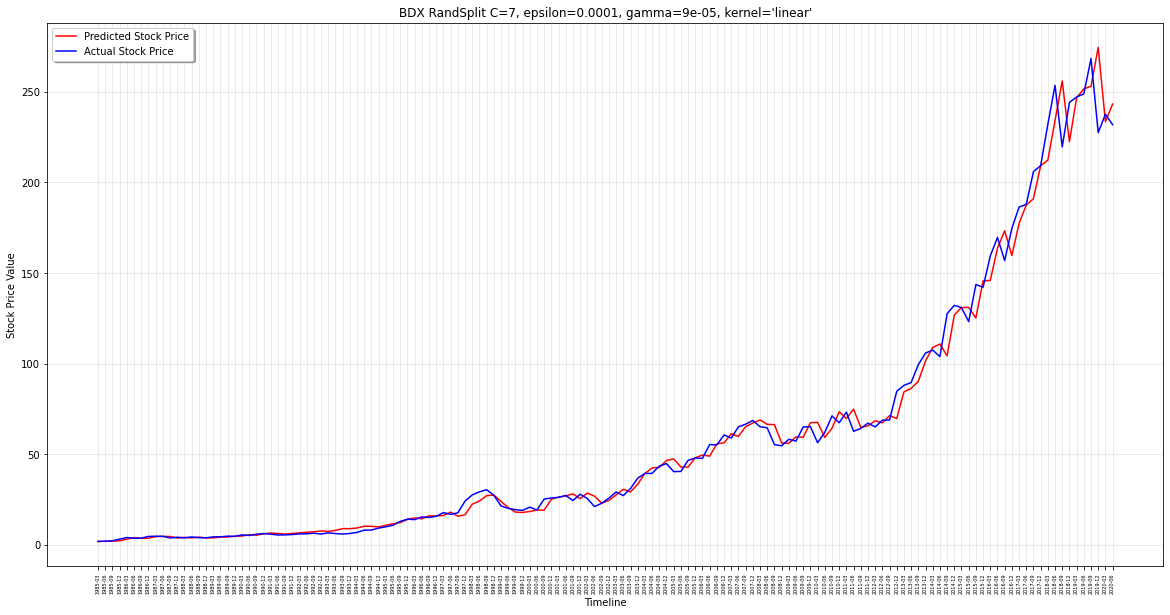

BDX MODEL RESULTS
 RMSE
 	Test: 6.314744885799422
 MAPE
 	Test: 0.10976983190114668
 MAE
 	Test: 3.5642170481160345
 R2 Score Adj
 	Test: 0.9896677700402639



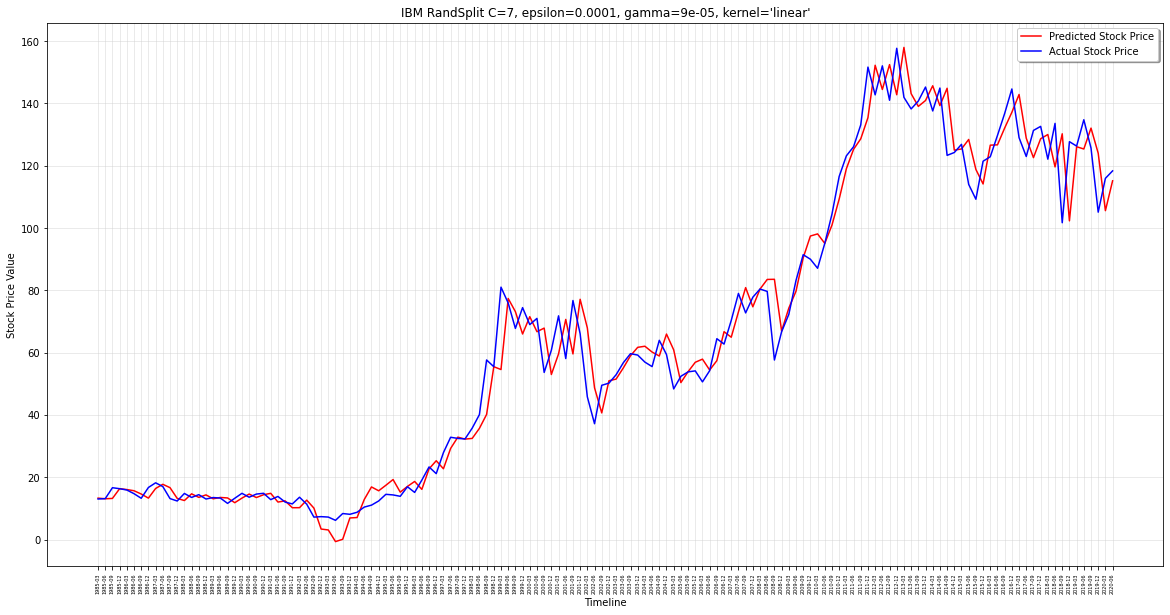

IBM MODEL RESULTS
 RMSE
 	Test: 8.910411967468319
 MAPE
 	Test: 0.15197469571653627
 MAE
 	Test: 6.143398859765194
 R2 Score Adj
 	Test: 0.9699859069129995



In [7]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'C': 7, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]}
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #2
Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], svr, label=stock, scaling=False)

In [16]:
datas['IBM']['X'][5]

array([  8.36844921,  18.23460388,  87.09226227, 122.10219574,
        16.6577034 , 138.23045349,  71.82076263,  13.53892422,
        58.11533737,  14.61547089, 151.65083313, 144.63392639,
        19.1114006 ,  48.36883545,  72.28405762,  15.92156219,
        14.87046814,  14.816329  ,  23.3187027 ,  81.02990723,
         7.22479391, 140.76638794, 141.94741821, 126.3030014 ,
       157.68991089,  13.03530884,  13.60630608,  12.83300591,
         8.12717533])

## 3.2 Random split - Scaled prediction variable

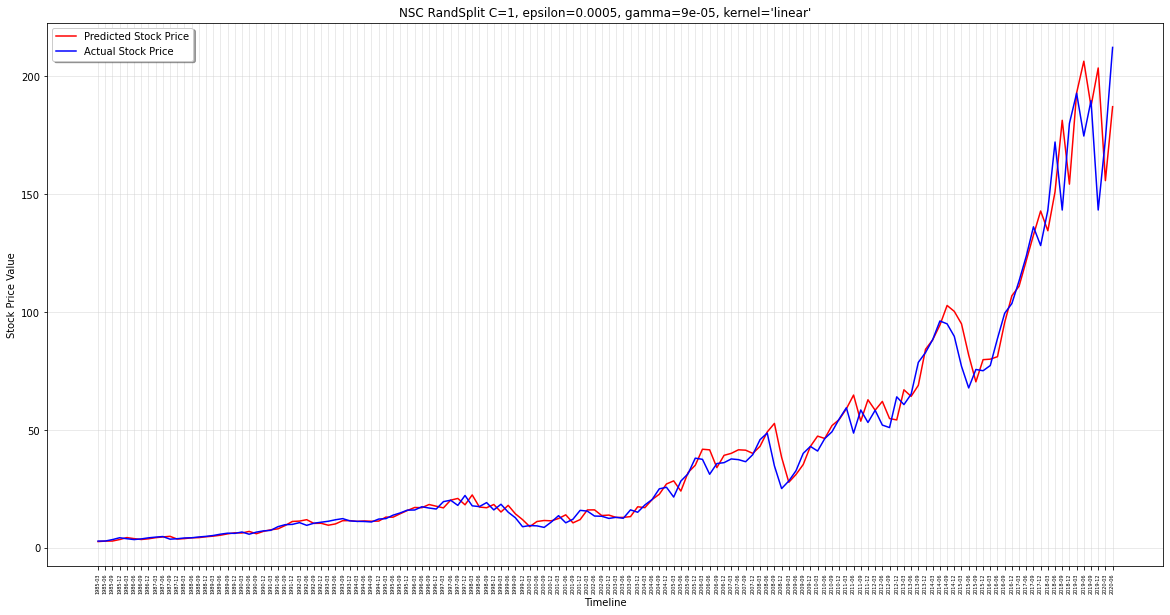

NSC MODEL RESULTS
 RMSE
 	Test: 4.258195342892093
 MAPE
 	Test: 0.09129514079881303
 MAE
 	Test: 2.6415134748121427
 R2 Score Adj
 	Test: 0.989942007704805



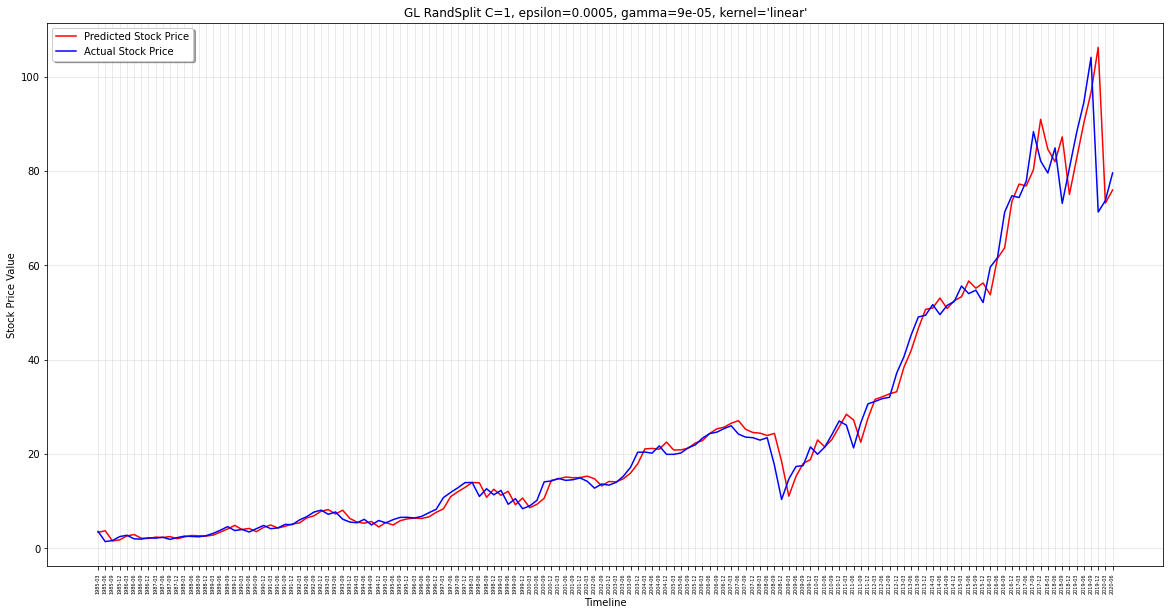

GL MODEL RESULTS
 RMSE
 	Test: 2.175210618145015
 MAPE
 	Test: 0.09656807191479616
 MAE
 	Test: 1.5373235365742421
 R2 Score Adj
 	Test: 0.9910942964014245



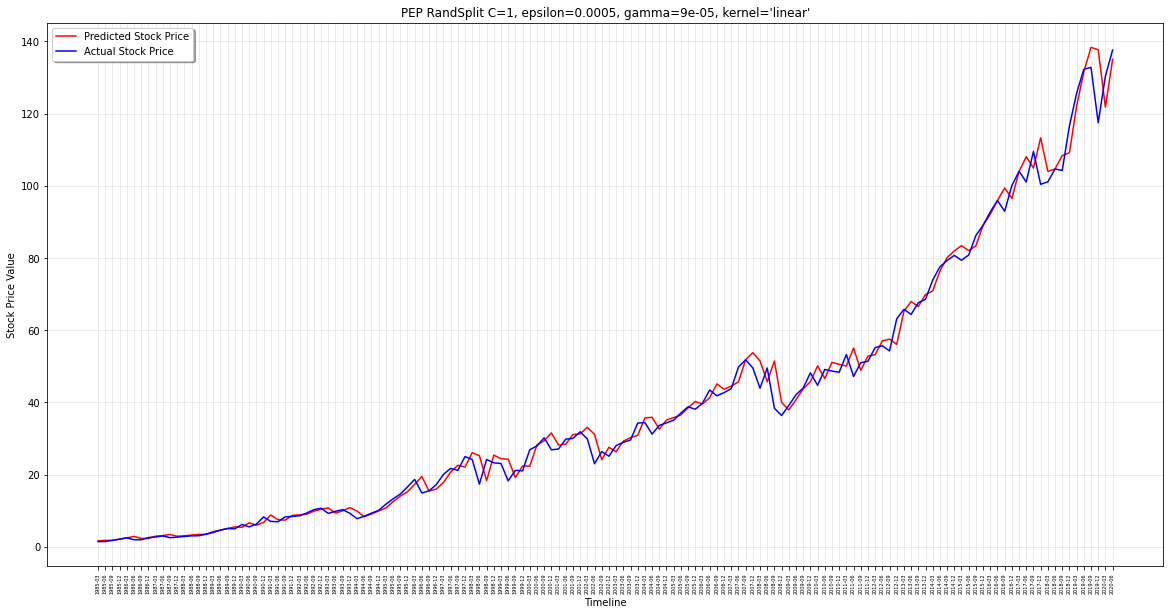

PEP MODEL RESULTS
 RMSE
 	Test: 2.3898516771680276
 MAPE
 	Test: 0.07226559787490523
 MAE
 	Test: 1.6058550043291864
 R2 Score Adj
 	Test: 0.9943780746321543



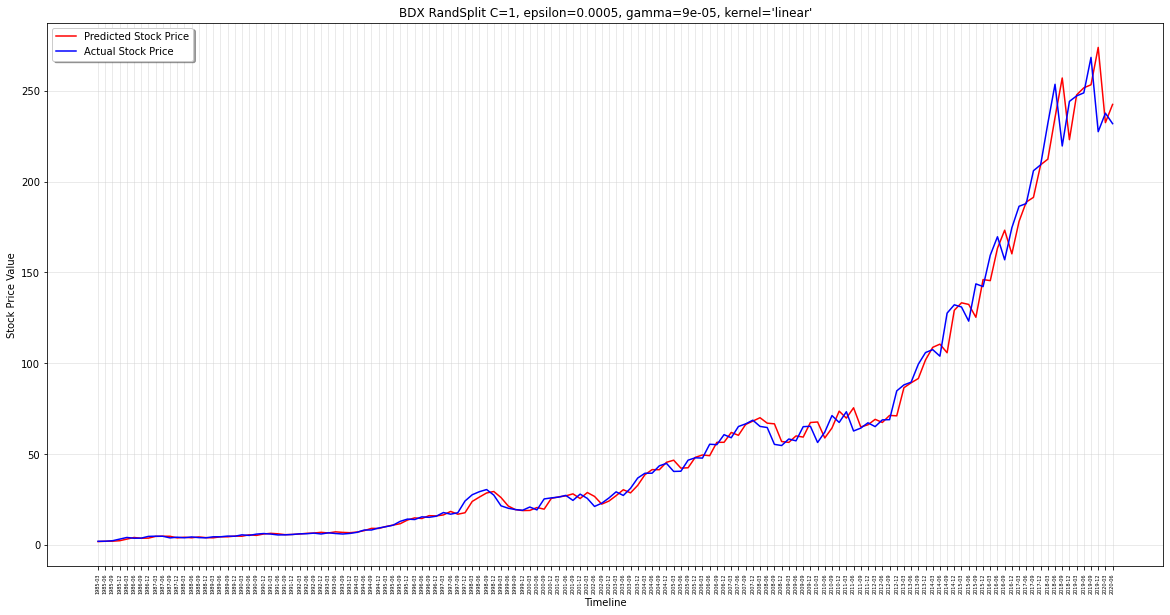

BDX MODEL RESULTS
 RMSE
 	Test: 6.001097895194873
 MAPE
 	Test: 0.07808432902422559
 MAE
 	Test: 3.114032772187383
 R2 Score Adj
 	Test: 0.9906686631624873



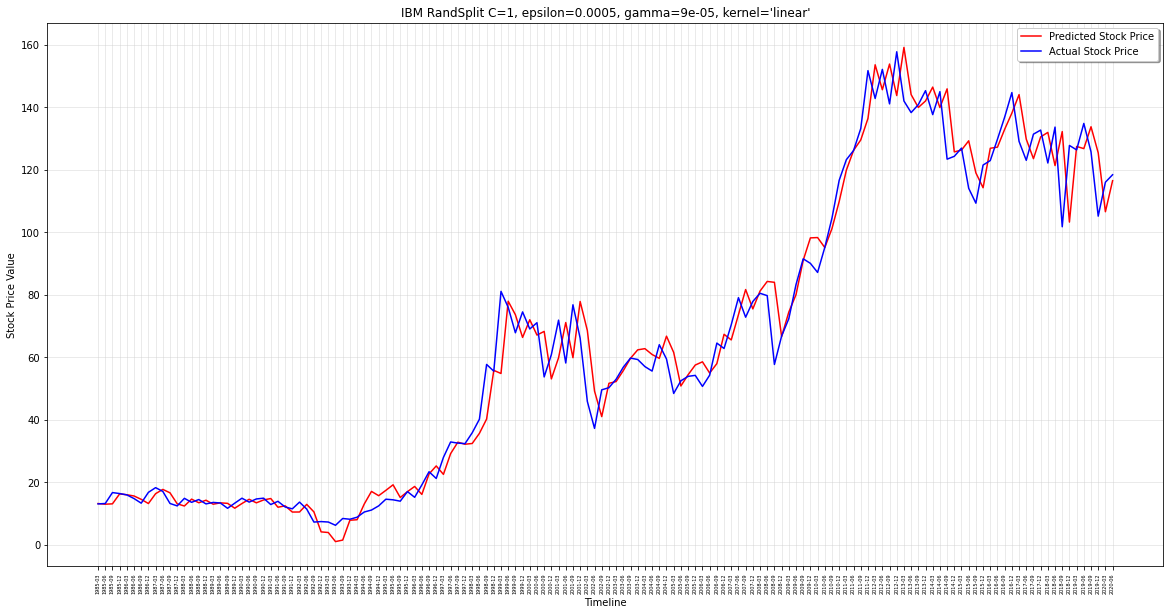

IBM MODEL RESULTS
 RMSE
 	Test: 8.924647442443012
 MAPE
 	Test: 0.1455267008670187
 MAE
 	Test: 6.1549432978862555
 R2 Score Adj
 	Test: 0.9698899279219981



In [10]:
from lib.fundamental_lib import model_results_revised
#Results log
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #2
#Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
Params={'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], svr, label=stock, scaling=True)

## 3.3 Sequential split - No scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
svr = GridSearchCV(SVR(), n_jobs=-1, #error_score=1,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, svr, scaling=False, manual=True)

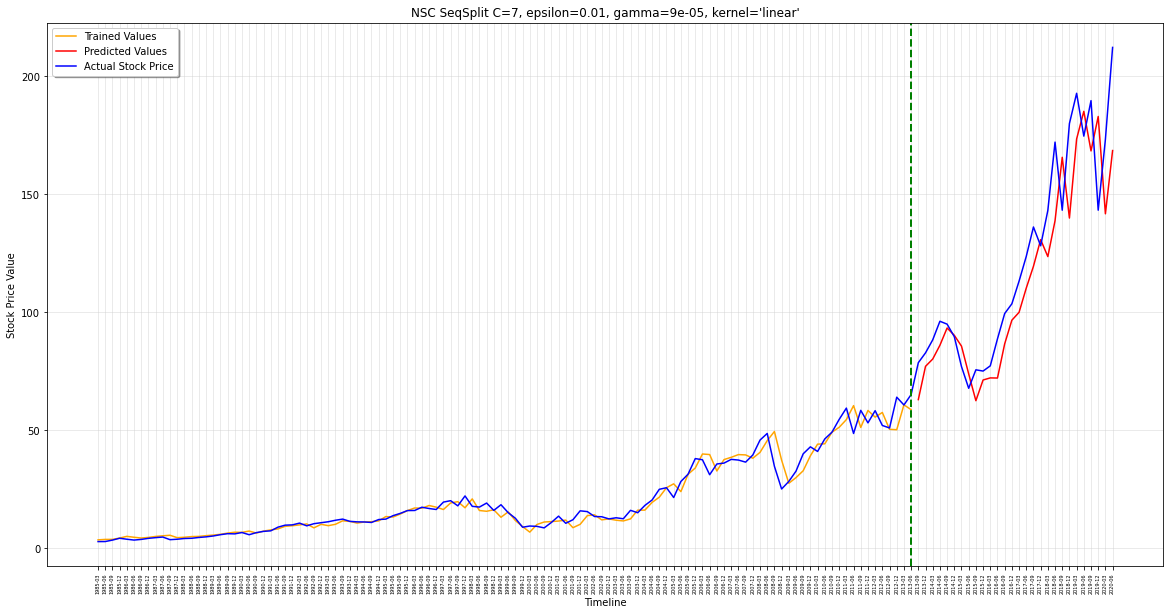

NSC MODEL RESULTS
 RMSE
 	Train: 3.5228557599513683
 	Test: 20.178453825331314
 	Dataset: 9.615957168125108
 MAPE
 	Train: 0.11220851986539557
 	Test: 0.12084545518085718
 	Dataset: 0.11396006618811154
 R2 Score Adj
 	Train: 0.9530906669415515
 	Test: 0.7819550440039127
 	Dataset: 0.9611513700628415



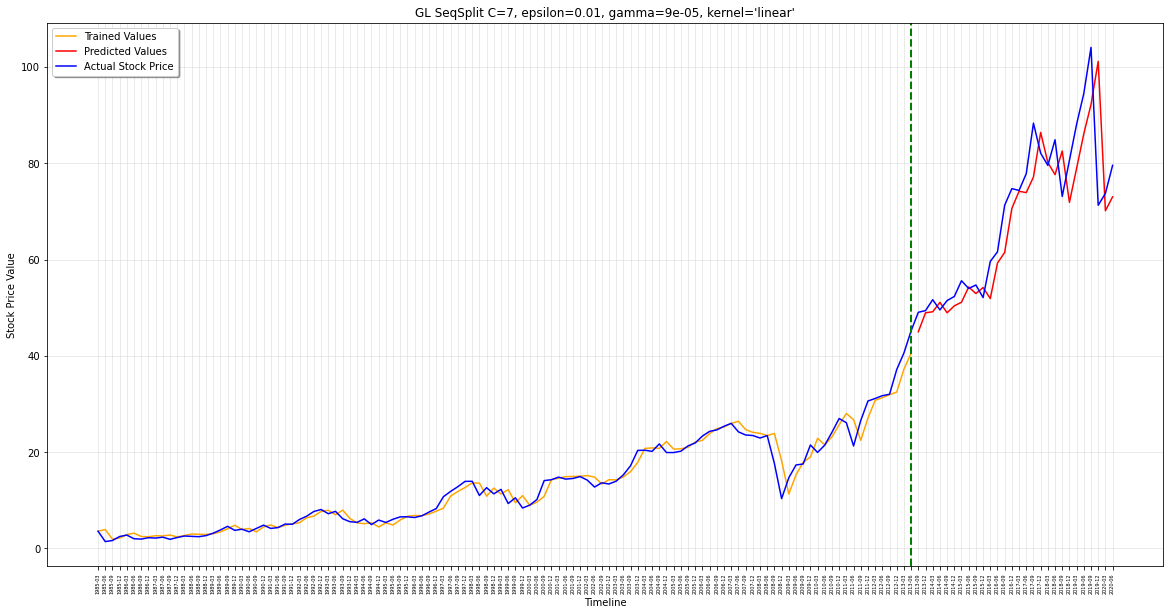

GL MODEL RESULTS
 RMSE
 	Train: 1.7674516362737218
 	Test: 8.4584322564743
 	Dataset: 4.1230463765815
 MAPE
 	Train: 0.12057054853785355
 	Test: 0.08113084941368333
 	Dataset: 0.11257228787630856
 R2 Score Adj
 	Train: 0.963989980530046
 	Test: 0.66470102419548
 	Dataset: 0.9728907355465416



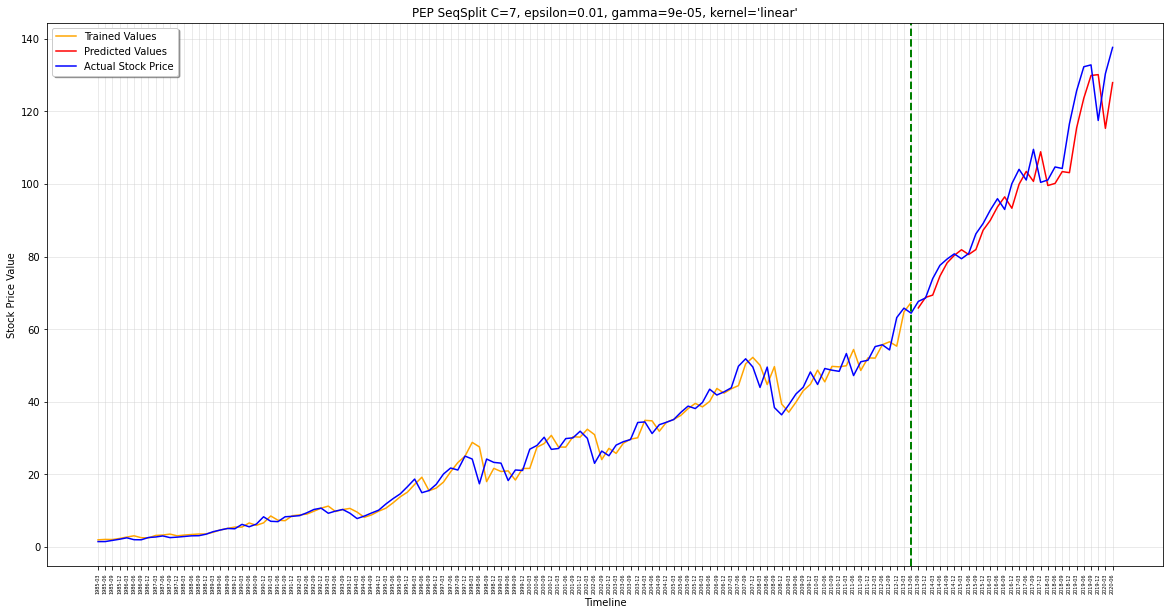

PEP MODEL RESULTS
 RMSE
 	Train: 2.7807379759269755
 	Test: 6.753346358494607
 	Dataset: 3.9260011371586883
 MAPE
 	Train: 0.09831069851270575
 	Test: 0.04709191956195879
 	Dataset: 0.08792367341080602
 R2 Score Adj
 	Train: 0.9743763776214232
 	Test: 0.8839107092911161
 	Dataset: 0.9876737315302223



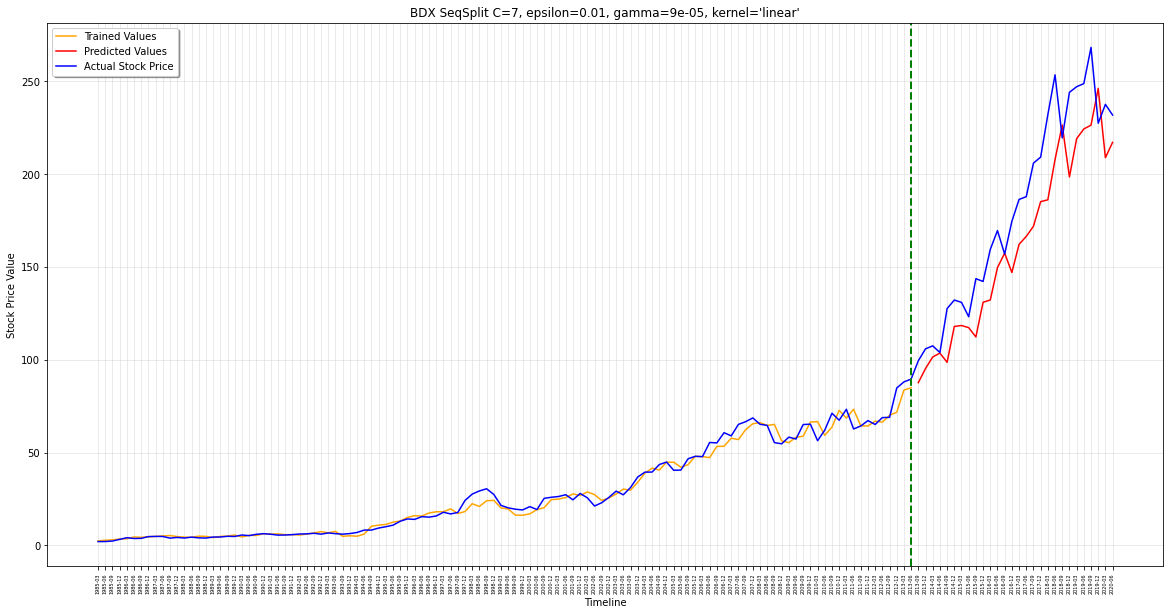

BDX MODEL RESULTS
 RMSE
 	Train: 3.4704882132907158
 	Test: 25.73234452052404
 	Dataset: 11.995191916473834
 MAPE
 	Train: 0.10160244415687271
 	Test: 0.11681245448969502
 	Dataset: 0.10468699170688564
 R2 Score Adj
 	Train: 0.9794776527855205
 	Test: 0.7280301050707478
 	Dataset: 0.969951135786385



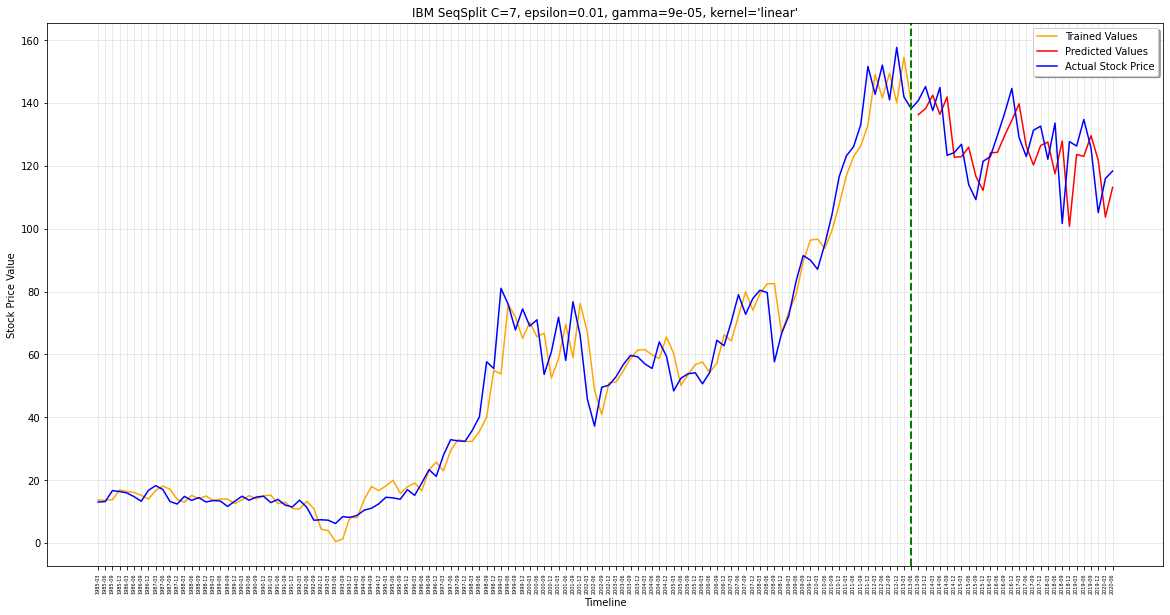

IBM MODEL RESULTS
 RMSE
 	Train: 7.140309217161703
 	Test: 11.227428053961303
 	Dataset: 8.13684397512541
 MAPE
 	Train: 0.1357169388673055
 	Test: 0.07494287517564609
 	Dataset: 0.12339212874801792
 R2 Score Adj
 	Train: 0.9658490519428485
 	Test: -0.23453248801162352
 	Dataset: 0.969404763530855



In [4]:
from lib.fundamental_lib import model_results_seq
#Results log
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #2
Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
#Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 5, 8, 9]} #1
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [1, 4, 7]} #P/S, P/B
#Params={'C': 1, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #Serial
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, svr, label=stock, scaling=False)

## 3.4. Sequential split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
svr = GridSearchCV(SVR(), n_jobs=-1, #error_score=1,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, svr, scaling=True, manual=True)

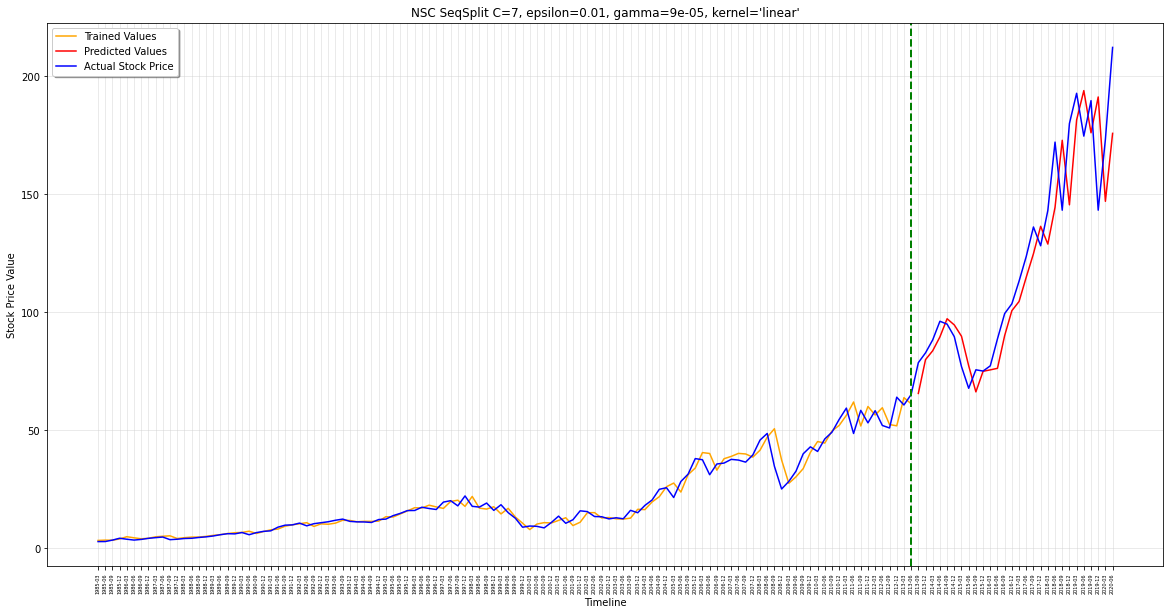

NSC MODEL RESULTS
 RMSE
 	Train: 3.4968389502662713
 	Test: 18.25902172232794
 	Dataset: 8.795398898416549
 MAPE
 	Train: 0.1007075998755089
 	Test: 0.10535695454411749
 	Dataset: 0.10165047599711484
 R2 Score Adj
 	Train: 0.9537809731824334
 	Test: 0.8469693246359096
 	Dataset: 0.9674986239569364

[ 78.69120789  82.85762787  88.35829926  96.23809814  95.01986694
  89.71379852  77.03516388  67.85177612  75.67884064  75.14569855
  77.35467529  88.78811646  99.50068665 103.6295929  113.21894836
 123.69528961 136.16723633 128.2086792  143.18119812 172.1144104
 143.27571106 179.9838562  192.79234314 174.65020752 189.68055725
 143.28366089 173.27191162 212.2223053  235.03128052]
[ 65.67585463  79.99369179  83.75257097  89.60827076  97.3092654
  94.67832832  89.89147952  77.38113859  66.33211491  75.04821048
  75.65276199  76.3062412   90.17911042 100.7166313  104.61014763
 114.92466033 124.84235686 136.44941874 128.93670658 144.48789523
 172.8861687  145.55424264 181.50751401 193.92743811 1

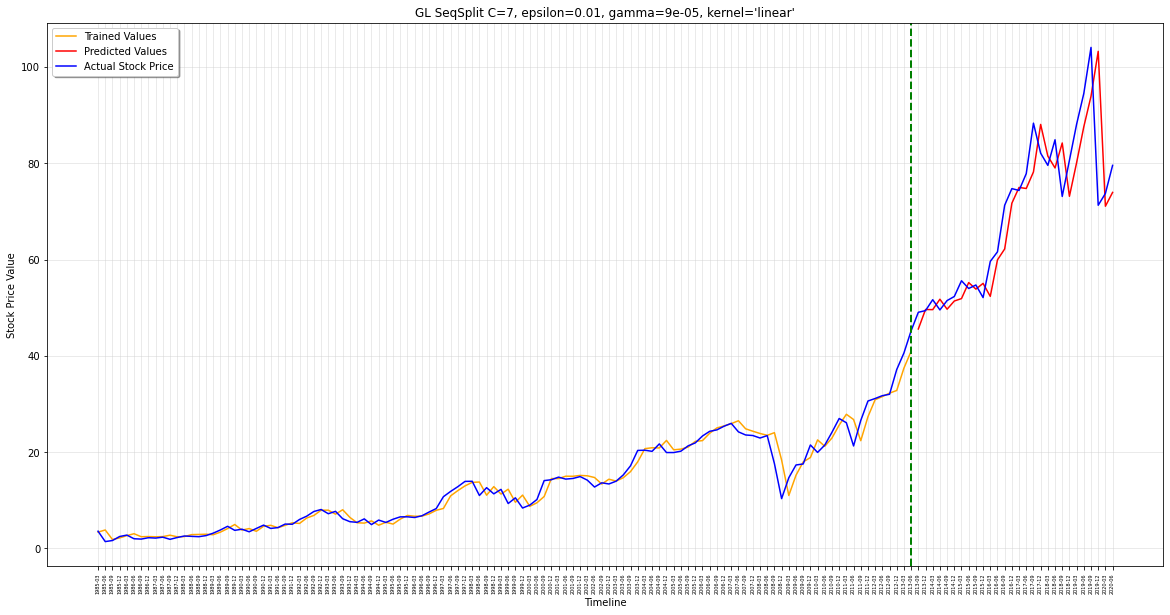

GL MODEL RESULTS
 RMSE
 	Train: 1.764298913351131
 	Test: 8.339548401373202
 	Dataset: 4.072547984555809
 MAPE
 	Train: 0.11913847800557202
 	Test: 0.07672818884210358
 	Dataset: 0.11053778999340011
 R2 Score Adj
 	Train: 0.964118332962753
 	Test: 0.7206229330252635
 	Dataset: 0.9735507285003555

[ 49.04058456  49.38572311  51.65207291  49.5303688   51.47608948
  52.31669235  55.59003448  53.98085022  54.70824432  52.09272766
  59.60264969  61.59840393  71.27052307  74.7281189   74.35044861
  77.83957672  88.32611847  82.09408569  79.5533905   84.87877655
  73.10694885  80.554039    88.11610413  94.50211334 104.06209564
  71.27485657  73.72296906  79.55969238  93.0302124 ]
[ 45.56863501  49.61809071  49.58780499  51.75224447  49.67612917
  51.38005845  51.8832788   55.21085688  53.85381346  55.04498209
  52.34644406  59.92795147  62.19172417  71.69188222  74.9733304
  74.75695859  78.19291251  88.0629388   81.48479673  79.01970729
  84.20816096  73.13550963  80.12768302  87.58865422  9

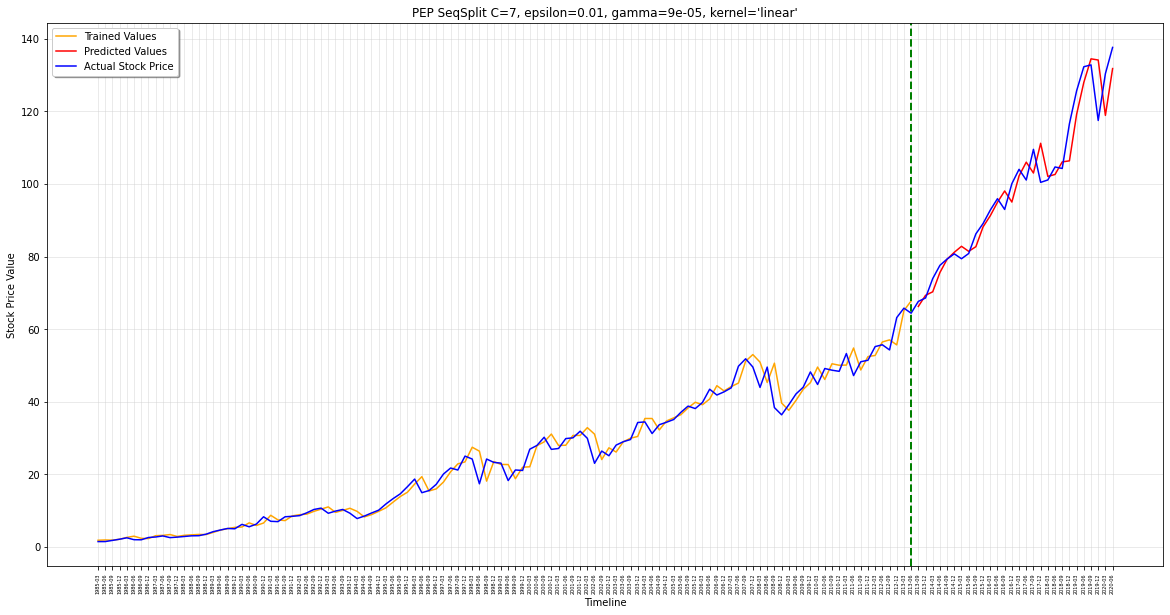

PEP MODEL RESULTS
 RMSE
 	Train: 2.7710197650811943
 	Test: 5.792538070694705
 	Dataset: 3.595263184292089
 MAPE
 	Train: 0.09183623856272796
 	Test: 0.03923780124970931
 	Dataset: 0.0811694226041438
 R2 Score Adj
 	Train: 0.9745551651468802
 	Test: 0.9267942635725857
 	Dataset: 0.9896630561884568

[ 67.62744141  68.56576538  73.91001129  77.56169891  79.3039093
  80.73027802  79.38634491  80.8249588   86.24182129  89.08338165
  92.7816391   95.93393707  92.9651947  100.07182312 104.02890015
 101.07420349 109.52980804 100.42974091 101.09339905 104.67281342
 104.25828552 116.58634949 125.6621933  132.29116821 132.79995728
 117.48714447 130.38684082 137.61959839 147.30999756]
[ 66.23900448  69.29584424  70.27388717  75.58191372  79.25340406
  81.16436477  82.81057859  81.42417787  82.70861525  88.17079792
  91.22653719  94.94800784  98.06060962  95.00367375 102.22108336
 106.00311653 103.00211787 111.20244197 102.06024897 102.61065405
 106.06687319 106.35841134 119.18500281 127.97965697 

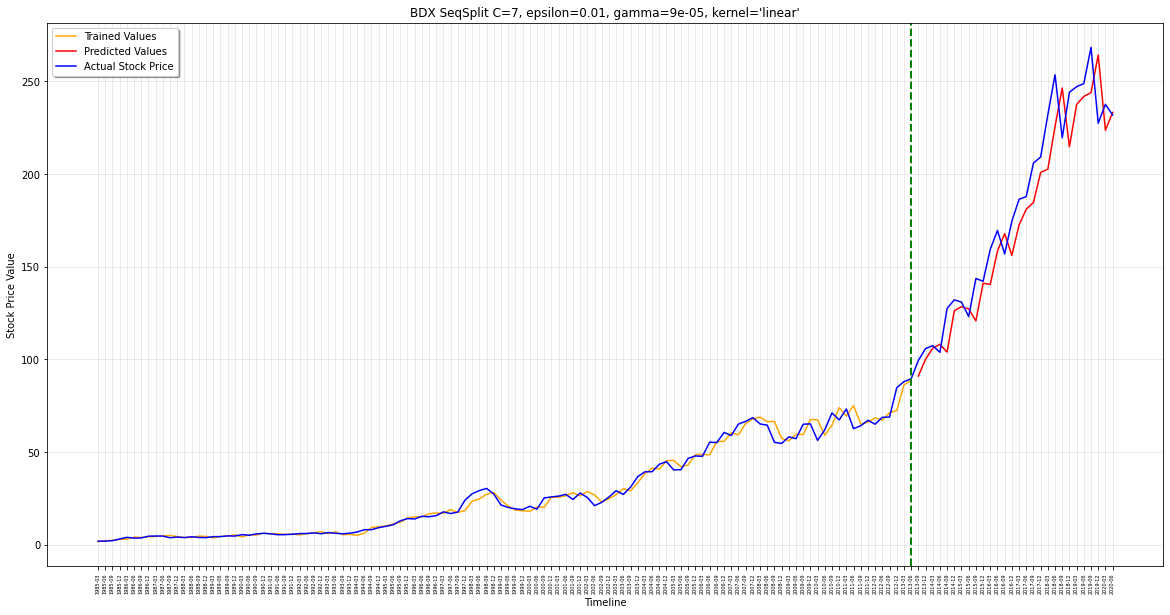

BDX MODEL RESULTS
 RMSE
 	Train: 3.19988166213668
 	Test: 17.402816785212202
 	Dataset: 8.341553490179257
 MAPE
 	Train: 0.08131706919655209
 	Test: 0.07550221744523956
 	Dataset: 0.08013783352670548
 R2 Score Adj
 	Train: 0.9825532829122732
 	Test: 0.8933761340292693
 	Dataset: 0.9854685973215558

[ 99.45191956 105.87985992 107.47441864 103.88162994 127.57023621
 132.16171265 130.93652344 123.16776276 143.68162537 142.19619751
 159.45890808 169.62254333 156.93536377 174.58729553 186.4032135
 187.89416504 205.965271   209.22163391 232.0440979  253.54972839
 219.5891571  244.13452148 247.15853882 248.83149719 268.34442139
 227.45849609 237.6386261  231.87611389 246.67999268]
[ 91.03017752 100.0945661  106.11832464 108.15840694 103.9999983
 126.27417388 128.45565735 127.30810885 120.826656   141.12535342
 140.51122892 158.505644   167.86488934 156.18563016 172.61095646
 181.0210175  184.70397204 200.90883368 202.64651162 225.71714765
 246.43214862 214.76875842 237.54683946 241.89911927 2

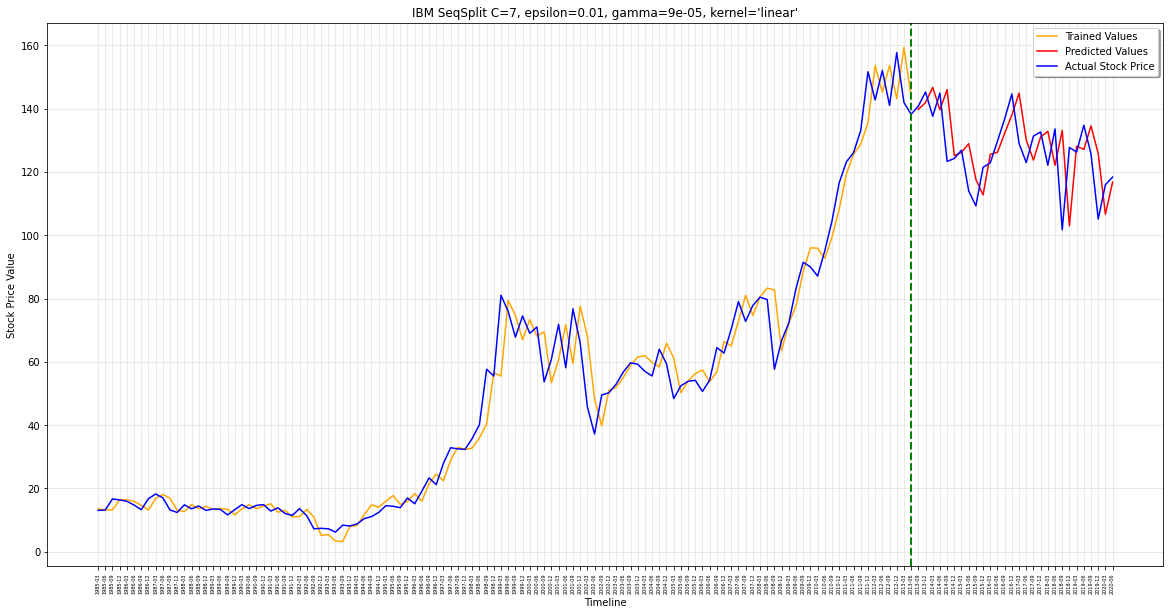

IBM MODEL RESULTS
 RMSE
 	Train: 7.119551303314455
 	Test: 11.707420072083819
 	Dataset: 8.258617065474397
 MAPE
 	Train: 0.1186791459697807
 	Test: 0.07332143831792774
 	Dataset: 0.10948072973269164
 R2 Score Adj
 	Train: 0.966047326828424
 	Test: -0.15058199900997615
 	Dataset: 0.9684821564178828

[140.76638794 145.25068665 137.58062744 144.92958069 123.32952118
 124.24108124 126.86603546 114.0074234  109.24240112 121.44861603
 122.88780212 129.72280884 136.7833252  144.63392639 129.01335144
 122.96054077 131.32865906 132.63032532 122.10219574 133.59014893
 101.70355225 127.7168045  126.3030014  134.75993347 125.6812439
 105.09851837 115.95575714 118.34945679 122.70037079]
[139.7714773  141.90129701 146.70530396 139.63196977 146.00447574
 125.1647808  126.1846952  128.92957528 117.61546396 112.7330467
 125.58097714 126.20938227 132.22705433 137.97247623 144.92185804
 130.03759239 123.73063771 131.09201192 132.81494528 122.09039279
 133.10568791 102.92494586 128.16400253 127.10667872 

In [3]:
from lib.fundamental_lib import model_results_seq
#Results log
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #2
Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [1, 4, 7]} #P/S, P/B
#Params={'C': 1, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #Serial
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, svr, label=stock, scaling=True)